# Homework Starter — Stage 15: Orchestration & System Design
Complete the sections below. Keep your answers concise and focused on orchestration readiness.

## 1) Project Task Decomposition
List 4–8 tasks. Add more rows as needed.

In [8]:
from pathlib import Path
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

tasks = pd.DataFrame({
    'Task': [
        'Data Ingestion',
        'Data Preprocessing',
        'Feature Engineering',
        'Model Training',
        'Model Persistence',
        'Reporting / API'
    ],
    'Inputs': [
        'None (download from Yahoo Finance)',
        'raw_prices.parquet',
        'cleaned_prices.parquet',
        'features.csv',
        'trained_model.pkl',
        'trained_model.pkl, features.csv'
    ],
    'Outputs': [
        'raw_prices.parquet',
        'cleaned_prices.parquet',
        'features.csv',
        'trained_model.pkl',
        'trained_model.pkl',
        'plots/, predictions/'
    ],
    'Idempotent': [
        True,   # can re-download safely
        True,   # deterministic cleaning
        True,   # deterministic feature computation
        False,  # retraining may produce slightly different model
        True,   # saving pickle overwrites safely
        True    # generating plots/predictions is safe
    ]
})

tasks


,Task,Inputs,Outputs,Idempotent
0,Data Ingestion,None (download from Yahoo Finance),raw_prices.parquet,True
1,Data Preprocessing,raw_prices.parquet,cleaned_prices.parquet,True
2,Feature Engineering,cleaned_prices.parquet,features.csv,True
3,Model Training,features.csv,trained_model.pkl,False
4,Model Persistence,trained_model.pkl,trained_model.pkl,True
5,Reporting / API,"trained_model.pkl, features.csv","plots/, predictions/",True


## 2) Dependencies (DAG)
Describe dependencies and paste a small diagram if you have one.

In [ ]:
dag = {
    'ingest': [],
    'clean': ['ingest'],
    'train_or_score': ['clean'],
    'report': ['train_or_score']
}
dag


{'ingest': [],
 'clean': ['ingest'],
 'train_or_score': ['clean'],
 'report': ['train_or_score']}

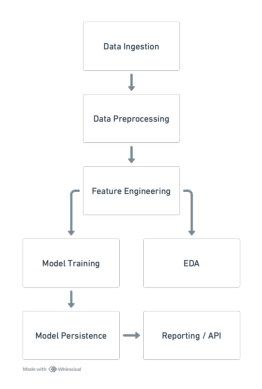

In [9]:
image_path = '/Users/paramshah/Desktop/bootcamp/homework/stage15_orchestration_system-design/data/DAG.png'

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

## 3) Logging & Checkpoints Plan
Specify what you will log and where you will checkpoint for each task.

In [6]:
import pandas as pd

# Define logging and checkpoint strategy
logging_plan = pd.DataFrame({
    'Task': [
        'Data Ingestion',
        'Data Preprocessing',
        'Feature Engineering',
        'Model Training',
        'Model Persistence',
        'Reporting / API'
    ],
    'Log_Messages': [
        'Start/End, number of rows downloaded, source URL, download errors',
        'Start/End, rows before/after cleaning, nulls handled, missing dates',
        'Start/End, features computed, summary statistics, anomalies',
        'Start/End, training parameters, performance metrics (R², tracking error)',
        'Start/End, pickle save confirmation, file size',
        'Start/End, plots generated, API request logs, prediction summary'
    ],
    'Checkpoint_Artifact': [
        'raw_prices.parquet',
        'cleaned_prices.parquet',
        'features.csv',
        'trained_model.pkl',
        'trained_model.pkl',
        'plots/, predictions/'
    ]
})

logging_plan


,Task,Log_Messages,Checkpoint_Artifact
0,Data Ingestion,"Start/End, number of rows downloaded, source U...",raw_prices.parquet
1,Data Preprocessing,"Start/End, rows before/after cleaning, nulls h...",cleaned_prices.parquet
2,Feature Engineering,"Start/End, features computed, summary statisti...",features.csv
3,Model Training,"Start/End, training parameters, performance me...",trained_model.pkl
4,Model Persistence,"Start/End, pickle save confirmation, file size",trained_model.pkl
5,Reporting / API,"Start/End, plots generated, API request logs, ...","plots/, predictions/"


## 4) Right-Sizing Automation
Which parts will you automate now? Which stay manual? Why?

**Automate now:**  
- Data ingestion, preprocessing, feature engineering, model training, and model persistence.  
- Rationale: These steps are repetitive, deterministic, and safe to rerun; automation reduces manual errors and ensures reproducibility.

**Keep manual:**  
- EDA interpretation, report generation, and API testing.  
- Rationale: These require human judgment and context; automating them now offers little benefit and could lead to misinterpretation.

## 5) (Stretch) Refactor One Task into a Function + CLI
Use the templates below.

In [ ]:
import argparse, json, logging, sys
from datetime import datetime

def my_task(input_path: str, output_path: str) -> None:
    '''Example task template: read → transform → write JSON.'''
    logging.info('[my_task] start')
    # TODO: implement your logic
    result = {'run_at': datetime.utcnow().isoformat(), 'note': 'replace with real output'}
    Path(output_path).parent.mkdir(parents=True, exist_ok=True)
    Path(output_path).write_text(json.dumps(result, indent=2))
    logging.info('[my_task] wrote %s', output_path)

def main(argv=None):
    parser = argparse.ArgumentParser(description='Homework task wrapper')
    parser.add_argument('--input', required=True)
    parser.add_argument('--output', required=True)
    args = parser.parse_args(argv)
    logging.basicConfig(level=logging.INFO, handlers=[logging.StreamHandler(sys.stdout)])
    my_task(args.input, args.output)

if **name** == '**main**'':
    # Example simulated CLI in notebook:
    main(['--input', 'data/in.ext', '--output', 'data/out.json'])